<h2> Instance_segmentation

In [36]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 pixellib opencv-python

In [38]:
#https://pixellib.readthedocs.io/en/latest/  Pixel lib documentation

In [1]:
import pixellib
from pixellib.instance import instance_segmentation
import cv2

In [2]:
instance_segmentation
##https://pixellib.readthedocs.io/en/latest/  Pixel lib documentation

pixellib.instance.instance_segmentation

In [3]:

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
              ]

## Setup the model

In [4]:
model_pixel_mrcnn = instance_segmentation()

In [5]:
dir(model_pixel_mrcnn)[-10:] #classes with pixellib

['__weakref__',
 'filter_objects',
 'load_model',
 'model_dir',
 'process_camera',
 'process_video',
 'segmentBatch',
 'segmentFrame',
 'segmentImage',
 'select_target_classes']

In [6]:
model_pixel_mrcnn = instance_segmentation()
model_pixel_mrcnn.load_model('mask_rcnn_coco.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
#your camera Video stream
'''
cap = cv2.VideoCapture('mrcnn_test_multi.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Apply instance segmentation
    res = model_pixel_mrcnn.segmentFrame(frame, show_bboxes=True)
    image = res[1]
    
    cv2.imshow('Instance Segmentation', image)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
'''

"\ncap = cv2.VideoCapture('mrcnn_test_multi.mp4')\nwhile cap.isOpened():\n    ret, frame = cap.read()\n    \n    # Apply instance segmentation\n    res = model_pixel_mrcnn.segmentFrame(frame, show_bboxes=True)\n    image = res[1]\n    \n    cv2.imshow('Instance Segmentation', image)\n    \n    if cv2.waitKey(10) & 0xFF == ord('q'):\n        break\n        \ncap.release()\ncv2.destroyAllWindows()\n"

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [77]:
img='cctv_1.jpeg'

In [80]:
res = model_pixel_mrcnn.segmentImage('cctv_1.jpeg', show_bboxes=True)
image = res[1]    


In [97]:
res[0]['class_ids']

array([ 1, 73], dtype=int32)

In [99]:
class_names[res[0]['class_ids'][0]]

'person'

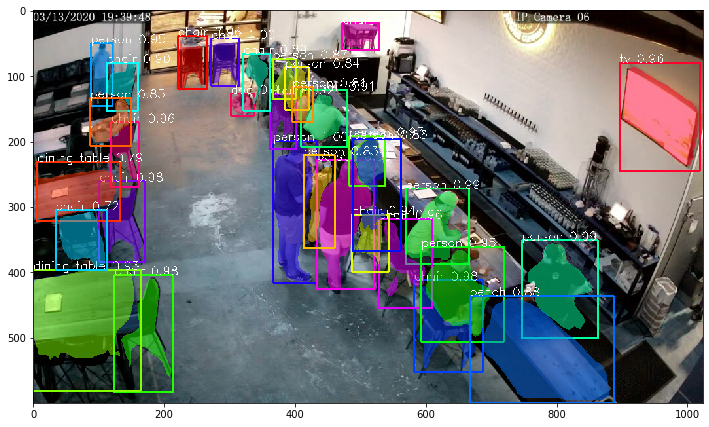

PERSON


In [81]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.imshow(image, interpolation='nearest')
ax.set_aspect(1)

plt.show()
print(class_names[res[0]['class_ids'][0]].upper())

In [82]:
#whats in the mrcnn results?
res

({'rois': array([[ 199,  367,  416,  433],
         [  43,  272,  115,  315],
         [ 229,  433,  426,  520],
         [ 351,  747,  501,  863],
         [ 272,  569,  388,  666],
         [ 404,  124,  583,  214],
         [ 412,  582,  552,  687],
         [ 261,  101,  384,  170],
         [ 127,  302,  161,  337],
         [ 318,  528,  455,  609],
         [ 171,  119,  270,  161],
         [  20,  472,   61,  529],
         [  80,  896,  245, 1019],
         [  39,  221,  120,  266],
         [ 361,  593,  506,  719],
         [  50,   88,  146,  121],
         [ 312,  487,  399,  543],
         [ 396,    0,  581,  164],
         [ 192,  483,  268,  538],
         [ 128,  362,  212,  401],
         [ 122,  409,  208,  480],
         [  80,  112,  153,  160],
         [  66,  321,  153,  362],
         [ 436,  667,  600,  887],
         [  74,  366,  135,  401],
         [ 134,   87,  207,  150],
         [  87,  385,  152,  421],
         [ 196,  488,  367,  562],
         [ 2

In [84]:
len(res[0]['class_ids'])

32

In [93]:
objects=[]
for i in res[0]['class_ids']:
    objects.append(class_names[i].upper())
print("no of objects",len(objects),"\n", objects)

no of objects 2 
 ['PERSON', 'REFRIGERATOR']


In [107]:
# to detect a class that can create an alert

In [116]:
if "KNIFE" in objects:
    print("ALERT")

ALERT


In [75]:
images = ['cctv_1.jpeg','cctv_2.jpeg','cctv_3.jpeg','cctv_4.jpeg']

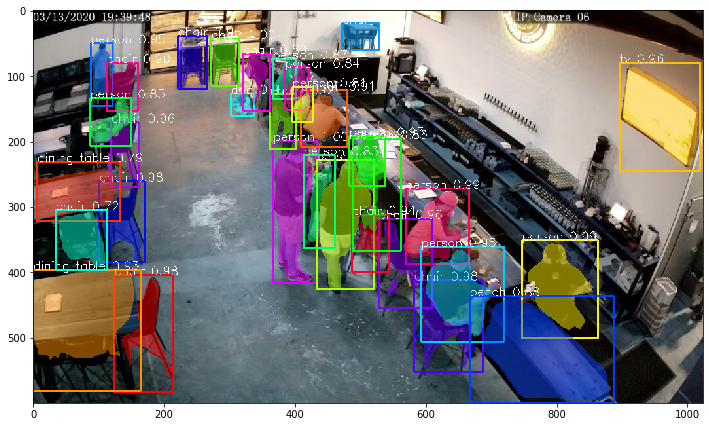

no of objects 32 
 ['PERSON', 'CHAIR', 'PERSON', 'PERSON', 'PERSON', 'CHAIR', 'CHAIR', 'CHAIR', 'DOG', 'CHAIR', 'CHAIR', 'CHAIR', 'TV', 'CHAIR', 'PERSON', 'PERSON', 'CHAIR', 'DINING TABLE', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'BENCH', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DINING TABLE', 'CHAIR']


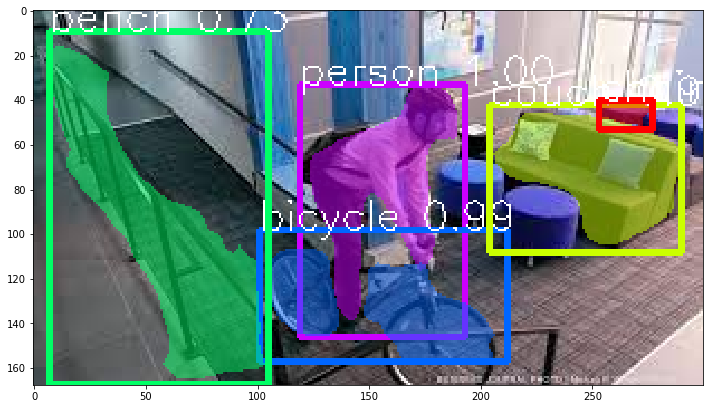

no of objects 37 
 ['PERSON', 'CHAIR', 'PERSON', 'PERSON', 'PERSON', 'CHAIR', 'CHAIR', 'CHAIR', 'DOG', 'CHAIR', 'CHAIR', 'CHAIR', 'TV', 'CHAIR', 'PERSON', 'PERSON', 'CHAIR', 'DINING TABLE', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'BENCH', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DINING TABLE', 'CHAIR', 'PERSON', 'BICYCLE', 'COUCH', 'CHAIR', 'BENCH']


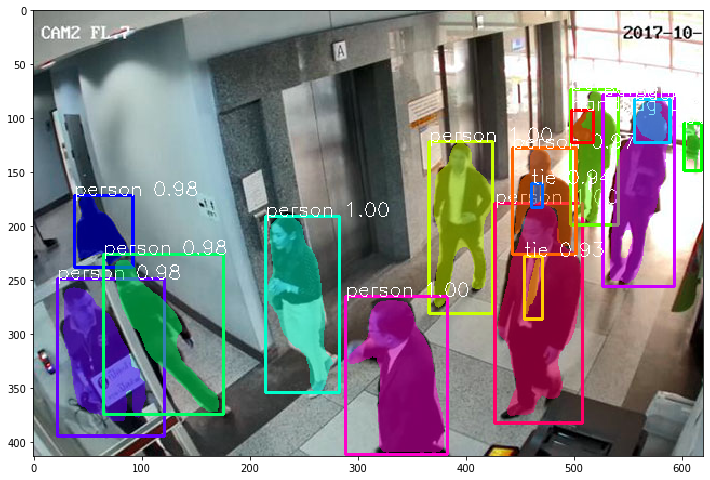

no of objects 52 
 ['PERSON', 'CHAIR', 'PERSON', 'PERSON', 'PERSON', 'CHAIR', 'CHAIR', 'CHAIR', 'DOG', 'CHAIR', 'CHAIR', 'CHAIR', 'TV', 'CHAIR', 'PERSON', 'PERSON', 'CHAIR', 'DINING TABLE', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'BENCH', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DINING TABLE', 'CHAIR', 'PERSON', 'BICYCLE', 'COUCH', 'CHAIR', 'BENCH', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'TIE', 'TIE', 'HANDBAG', 'BACKPACK', 'PERSON']


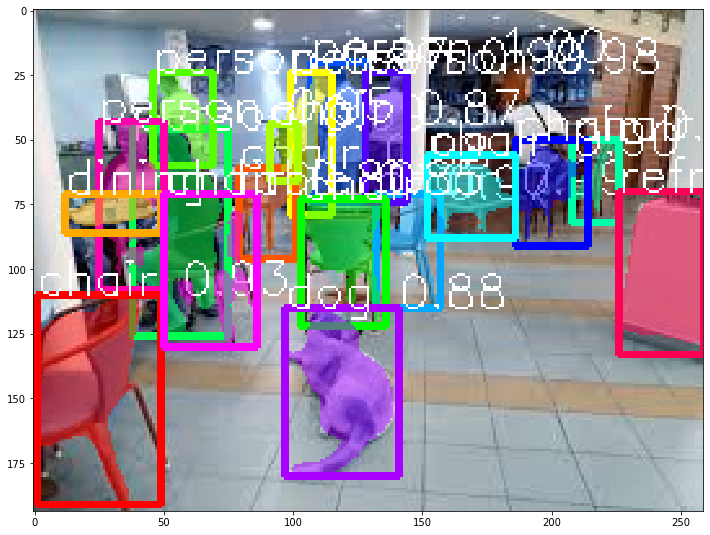

no of objects 70 
 ['PERSON', 'CHAIR', 'PERSON', 'PERSON', 'PERSON', 'CHAIR', 'CHAIR', 'CHAIR', 'DOG', 'CHAIR', 'CHAIR', 'CHAIR', 'TV', 'CHAIR', 'PERSON', 'PERSON', 'CHAIR', 'DINING TABLE', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'BENCH', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DINING TABLE', 'CHAIR', 'PERSON', 'BICYCLE', 'COUCH', 'CHAIR', 'BENCH', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'TIE', 'TIE', 'HANDBAG', 'BACKPACK', 'PERSON', 'PERSON', 'CHAIR', 'PERSON', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'DOG', 'CHAIR', 'DINING TABLE', 'REFRIGERATOR', 'CHAIR']


In [119]:
objects=[]
for img in images:
    res = model_pixel_mrcnn.segmentImage(img, show_bboxes=True)
    image = res[1]
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)

    ax.imshow(image, interpolation='nearest')
    ax.set_aspect(1)

    plt.show()
    for i in res[0]['class_ids']:
        objects.append(class_names[i].upper())
    print("no of objects",len(objects),"\n", objects)

# Detect unwanted objects and create an alert

In [120]:
#for example we dont want lobby to have animals or by bicycles

In [127]:
alert_list=["DOG","CAT",'BICYCLE']

In [128]:
alert_images = ['cctv_alert1.jpeg','cctv_alert2.jpeg','cctv_alert5.jpeg']

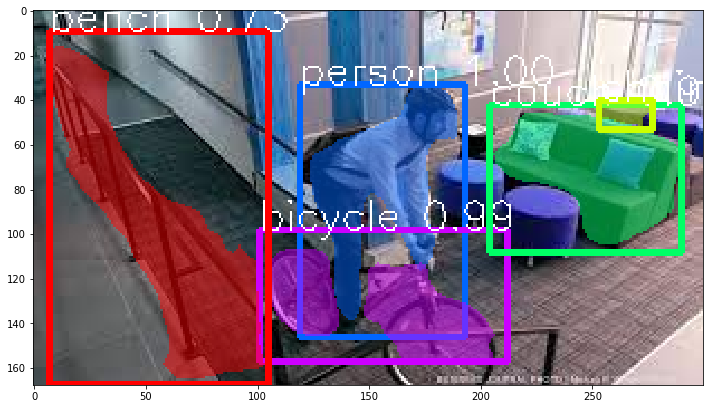

no of objects 5 
 ['PERSON', 'BICYCLE', 'COUCH', 'CHAIR', 'BENCH']
ALERT


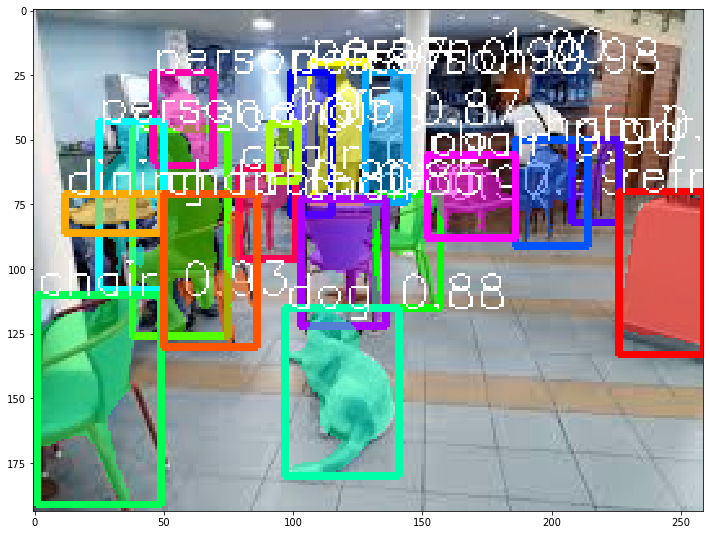

no of objects 23 
 ['PERSON', 'BICYCLE', 'COUCH', 'CHAIR', 'BENCH', 'PERSON', 'CHAIR', 'PERSON', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'DOG', 'CHAIR', 'DINING TABLE', 'REFRIGERATOR', 'CHAIR']
ALERT
ALERT


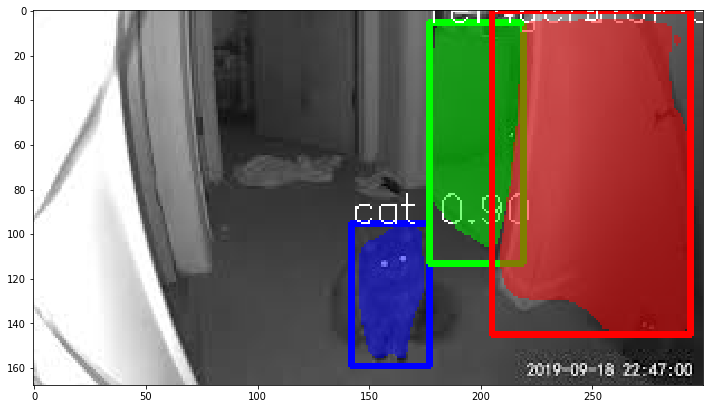

no of objects 26 
 ['PERSON', 'BICYCLE', 'COUCH', 'CHAIR', 'BENCH', 'PERSON', 'CHAIR', 'PERSON', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'PERSON', 'CHAIR', 'PERSON', 'CHAIR', 'CHAIR', 'DOG', 'CHAIR', 'DINING TABLE', 'REFRIGERATOR', 'CHAIR', 'CAT', 'REFRIGERATOR', 'REFRIGERATOR']
ALERT
ALERT
ALERT


In [130]:
objects=[]
for img in alert_images:
    res = model_pixel_mrcnn.segmentImage(img, show_bboxes=True)
    image = res[1]
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)

    ax.imshow(image, interpolation='nearest')
    ax.set_aspect(1)

    plt.show()
    for i in res[0]['class_ids']:
        objects.append(class_names[i].upper())
    print("no of objects",len(objects),"\n", objects)
    
    for alert in alert_list:
        if alert in objects:
            print("ALERT")
        #print '\033[0m'

In [71]:
#Print class
class_names[res[0]['class_ids'][0]].upper()

'PERSON'

In [73]:
#whats in the mrcnn results?
res

({'rois': array([[171, 240, 394, 349],
         [  1, 183, 391, 490]], dtype=int32),
  'class_ids': array([ 1, 73], dtype=int32),
  'scores': array([0.99975425, 0.8558481 ], dtype=float32),
  'masks': array([[[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         ...,
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
      

# Detect objects in streaming video

In [9]:
import time

In [10]:
alert_list=["DOG","CAT",'BICYCLE']

In [11]:
alert_images = ['cctv_alert1.jpeg','cctv_alert2.jpeg','cctv_alert5.jpeg']

In [ ]:
#your camera Video stream
cap = cv2.VideoCapture('cctv_video1.mp4')
objects=[]

def rescale_frame(frame, percent=100):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

while cap.isOpened():
    ret, frame = cap.read()
    frame75 = rescale_frame(frame, percent=100)
    # Apply instance segmentation
    res = model_pixel_mrcnn.segmentFrame(frame75, show_bboxes=True)
    image = res[1]
    
    cv2.imshow('Instance Segmentation', image)
    
    #prit classes per frame
    '''
    for i in res[0]['class_ids']:
        objects.append(class_names[i].upper())
    print("no of objects",len(objects),"\n", objects)
    for alert in alert_list:
        if alert in objects:
            print("ALERT")
    '''
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
